In [42]:
import torch
import torchaudio
import torchvision

In [44]:
import os
import pandas as pd


In [45]:

root_folder = '/content/IRMAS-TrainingData'
filenames = []
folder_names = []

for root, dirs, files in os.walk(root_folder):
    for file in files:
        filenames.append(file)
        folder_names.append(os.path.basename(root))

df = pd.DataFrame({'filename': filenames, 'instrument': folder_names})
df = df[df['filename'] != 'README.txt'].reset_index(drop=True)

In [46]:
df['full_loc'] = df.apply(lambda row:f"/content/IRMAS-TrainingData/{row['instrument']}/{row['filename']}", axis=1)

In [47]:
df

,filename,instrument,full_loc
0,[flu][jaz_blu]0448__3.wav,flu,/content/IRMAS-TrainingData/flu/[flu][jaz_blu]...
1,[flu][pop_roc]0475__3.wav,flu,/content/IRMAS-TrainingData/flu/[flu][pop_roc]...
2,[flu][cla]0402__2.wav,flu,/content/IRMAS-TrainingData/flu/[flu][cla]0402...
3,[flu][cla]0359__2.wav,flu,/content/IRMAS-TrainingData/flu/[flu][cla]0359...
4,[flu][cla]0439__2.wav,flu,/content/IRMAS-TrainingData/flu/[flu][cla]0439...
...,...,...,...
6700,239__[pia][nod][cla]1391__3.wav,pia,/content/IRMAS-TrainingData/pia/239__[pia][nod...
6701,[pia][jaz_blu]1500__2.wav,pia,/content/IRMAS-TrainingData/pia/[pia][jaz_blu]...
6702,[pia][pop_roc]1443__1.wav,pia,/content/IRMAS-TrainingData/pia/[pia][pop_roc]...
6703,[pia][jaz_blu]1359__2.wav,pia,/content/IRMAS-TrainingData/pia/[pia][jaz_blu]...


In [48]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

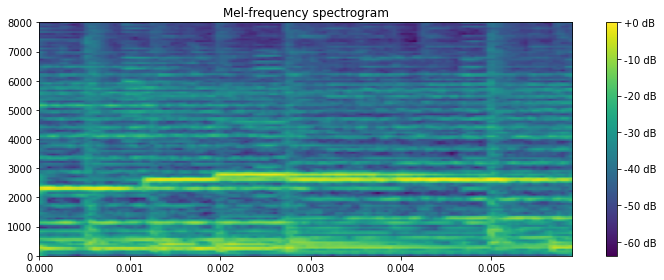

In [266]:
waveform, sr = librosa.load('/content/IRMAS-TrainingData/flu/160__[flu][dru][pop_roc]0422__1.wav')

# Calculate the mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=128,
                                                  fmax=8000)



# Plot the mel-spectrogram using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
          origin='lower', aspect='auto',
          extent=[0, mel_spectrogram.shape[1]/sr, 0, 8000])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

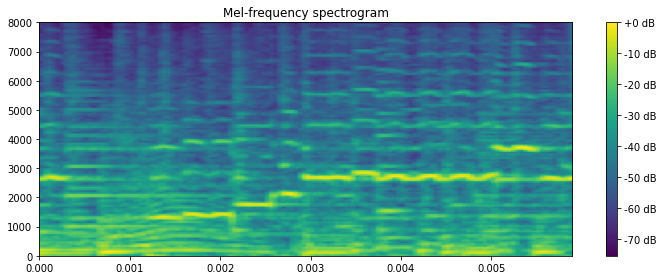

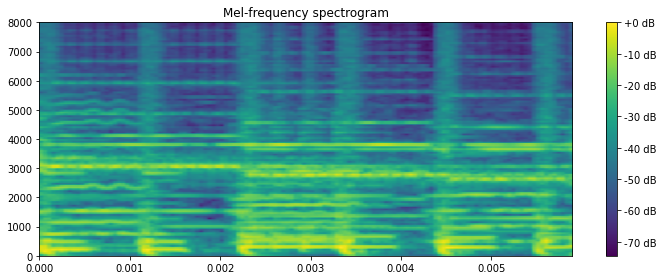

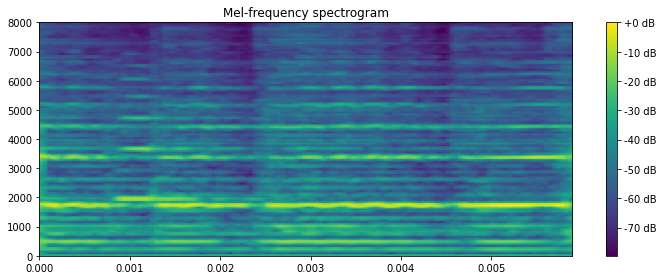

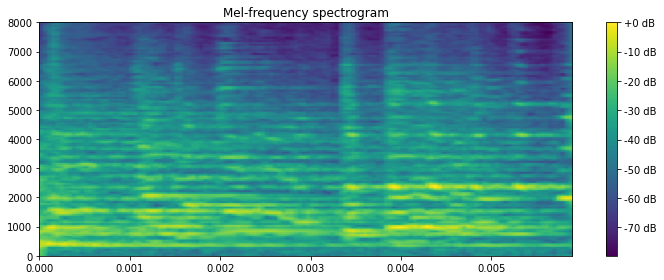

In [49]:
data = []
pltcount=5
for file in df.full_loc:
  # Load the waveform using librosa
  waveform, sr = librosa.load(file)

  # Calculate the mel-spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=128,
                                                    fmax=8000)
  data.append(mel_spectrogram)
  pltcount-=1
  if pltcount >0:
  # Plot the mel-spectrogram using matplotlib
    plt.figure(figsize=(10, 4))
    plt.imshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
              origin='lower', aspect='auto',
              extent=[0, mel_spectrogram.shape[1]/sr, 0, 8000])
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()


In [50]:
target = df.instrument

In [51]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [52]:
# http://noiselab.ucsd.edu/ECE228_2019/Reports/Report38.pdf

In [53]:
data = np.array(data)

In [54]:
data.shape

(6705, 128, 130)

In [55]:
data = np.array(data[:,:,:, np.newaxis])

In [56]:
data.shape

(6705, 128, 130, 1)

In [57]:
np.save('dataset.npy', data)

In [58]:
data = np.load('dataset.npy')

In [59]:
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [79]:
target = encoder.fit_transform([[i] for i in target])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=42)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [229]:
from keras.callbacks import EarlyStopping

In [241]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Sequential
from tensorflow.keras import regularizers

model = Sequential()

model.add(Conv2D(32, (8, 8), strides=(4, 4), padding='same', activation=LeakyReLU()))
model.add(Conv2D(64, (4, 4), strides=(1, 1), padding='same', activation='relu'))
model.add(Dropout(.1))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2, 2), strides=(1, 1), padding='same', activation=LeakyReLU()))
model.add(Conv2D(128, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, (4, 4), strides=(1, 1), padding='same', activation='relu'))
model.add(Dropout(.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (2, 2), strides=(1, 1), padding='same', activation=LeakyReLU()))
model.add(Conv2D(256, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(512, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Dropout(.1))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (2, 2), strides=(1, 1), padding='same', activation=LeakyReLU()))
model.add(Conv2D(512, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(512, (2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(2000, activation=LeakyReLU(),
                kernel_regularizer=regularizers.L1L2(l1=0.003, l2=0.003), 
                bias_regularizer=regularizers.L2(0.001),
                activity_regularizer=regularizers.L2(0.001)))
model.add(Dense(500, activation='relu'))
model.add(Dense(11, activation='softmax'))


In [242]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [243]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20)

In [244]:
from keras.callbacks import ModelCheckpoint

In [245]:
MODEL_SAVE_FOLDER_PATH = '/content/model/'

In [246]:
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:03d}.hdf5'

In [247]:
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [248]:
model.fit(X_train, y_train,
          batch_size=50,
          validation_data=(X_val, y_val),
          epochs=300,
          callbacks=[early_stopping, checkpoint])

Epoch 1/300
86/86 [==============================] - ETA: 0s - loss: 45.4440 - accuracy: 0.1501
Epoch 1: val_loss improved from inf to 4.15647, saving model to /content/model/001.hdf5
86/86 [==============================] - 5s 48ms/step - loss: 45.4440 - accuracy: 0.1501 - val_loss: 4.1565 - val_accuracy: 0.1221
Epoch 2/300
85/86 [============================>.] - ETA: 0s - loss: 3.8475 - accuracy: 0.1762
Epoch 2: val_loss improved from 4.15647 to 3.78748, saving model to /content/model/002.hdf5
86/86 [==============================] - 4s 43ms/step - loss: 3.8473 - accuracy: 0.1757 - val_loss: 3.7875 - val_accuracy: 0.2041
Epoch 3/300
85/86 [============================>.] - ETA: 0s - loss: 3.9425 - accuracy: 0.1621
Epoch 3: val_loss did not improve from 3.78748
86/86 [==============================] - 3s 40ms/step - loss: 3.9425 - accuracy: 0.1622 - val_loss: 3.9462 - val_accuracy: 0.1584
Epoch 4/300
85/86 [============================>.] - ETA: 0s - loss: 3.7825 - accuracy: 0.1772
E

In [251]:
from keras.models import load_model
bestmodel = load_model('/content/model/028.hdf5')

In [257]:
model.evaluate(X_val, y_val)

34/34 [==============================] - 1s 16ms/step - loss: 4.6666 - accuracy: 0.4595


[4.6666083335876465, 0.45945945382118225]

In [256]:
model.evaluate(X_test, y_test)

42/42 [==============================] - 0s 11ms/step - loss: 4.7538 - accuracy: 0.4661


[4.753783702850342, 0.4660700857639313]